I would like you to work on a small project on analysis and model building on a gas plant compressor data. I am attaching a sheet containing data for a compressor building in a gas pumping station in Canada. The data is for 1 day(Feb 1st). I have added the Tag description and Compressor Building P&ID diagram to make it easy to understand in second and third tabs. 

Work to be done. 
1. Analysis of stability of the Compressor
2. Model building for discharge pressures after Stage 1, Stage 2 and Stage 3

There is no correct way of doing. I would rather like to see your approach to handling this project. Please use Python and make sure you keep enough comments for reader to understand your code and will be able to execute. If you need any clarification to understand data, please feel free to reach out to me.    

Please let me know if you have any questions. I will be out of town from Nov 22nd to Dec 5th. Hope we can close on it much before that.  Please let me know when you think we can have a follow-up call on the models. 

In [9]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_excel('K300CompressorData.xlsx', sheet_name='Data')

In [4]:
df.head()

,Date,Time,Tagname,Value
0,2017-02-01,00:00:00,K300_EI_0300.PV ...,26.0
1,2017-02-01,00:00:00,K300_PDI_0311.PV ...,1286.0
2,2017-02-01,00:00:00,K300_PDI_0321.PV ...,2367.0
3,2017-02-01,00:00:00,K300_PDI_0331.PV ...,1530.0
4,2017-02-01,00:00:00,K300_PIC_301.PV ...,1070.0


In [5]:
df.tail()

,Date,Time,Tagname,Value
440737,2017-02-02,00:00:00,K300_TI_0410.PV ...,674.799988
440738,2017-02-02,00:00:00,K300_TI_0411.PV ...,693.099976
440739,2017-02-02,00:00:00,K300_TI_0412.PV ...,658.299988
440740,2017-02-02,00:00:00,K300_VI_0200.PV ...,10.800000
440741,2017-02-02,00:00:00,K300_VI_0301.PV ...,12.400000


In [7]:
df['DateTime']=[datetime.datetime.combine(x,y)-
                     datetime.datetime(2017, 2, 1, 0, 0) 
                    for x,y in zip(df.Date,df.Time)]
df.DateTime=[x.seconds+x.days*86400 for x in df.DateTime]
df=df.drop(columns=['Date','Time'])

In [10]:
parse=[re.match('K300_(.+)_(.+)\..+',tagname).groups() for tagname in df.Tagname]
df['Tag']=[x[0] for x in parse]
df['Number']=[x[1] for x in parse]

In [11]:
df.groupby(['Tag','Number']).Value.describe()

count          mean         std           min           25%  \
Tag Number                                                                 
EI  0300    8642.0     26.000266    0.006538     25.900000     26.000000   
PDI 0311    8642.0   1322.649850   46.804019   1224.000000   1290.000000   
    0321    8642.0   2288.739296   64.347272   2154.000000   2251.250000   
    0331    8642.0   1600.785466  143.398212    730.000000   1518.000000   
PI  0200    8642.0    414.870053    0.942329    412.000000    414.000000   
    0302    8642.0     26.135721    1.770434     23.000000     25.100000   
    0303    8642.0     30.033858    1.644363     26.799999     29.100000   
    0304    8642.0    355.840546   21.901454    302.000000    340.000000   
    0311    8642.0    925.611085   26.685392    894.000000    914.000000   
    0312    8642.0   2248.293335   68.819298   2124.000000   2208.000000   
    0321    8642.0   2057.088290   62.458648   1935.000000   2022.000000   
    0322    8642.0   4345.822611  114.161980   4160.000000   4290.000000   
    0331    8642.0   4175.300741  111.319298   3968.000000   4117.000000   
    0332    8642.0   5776.098357  134.403370   5452.000000   5678.000000   
PIC 301     8642.0   1070.000000    0.000000   1070.000000   1070.000000   
    301A    8642.0    850.000000    0.000000    850.000000    850.000000   
    352     8642.0   6300.000000    0.000000   6300.000000   6300.000000   
PY  301     8642.0     98.914256    7.207149     43.000000    100.000000   
    352     8642.0      0.000000    0.000000      0.000000      0.000000   
QI  0300    8642.0  19764.530317    6.925886  19753.000000  19759.000000   
    0301    8642.0    661.840546    6.940505    650.000000    656.000000   
    0302    8642.0   2500.000000    0.000000   2500.000000   2500.000000   
SI  0301    8642.0   1199.665355    0.950834   1196.000000   1199.000000   
SIC 0301    8642.0   1200.000000    0.000000   1200.000000   1200.000000   
TI  0200    8642.0     72.274045    0.175059     71.900002     72.199997   
    0301    8642.0     81.354710    0.999447     78.699997     80.599998   
    0302    8642.0     39.221407    0.695653     37.700001     38.700001   
    0303    8642.0     39.399954    0.589528     38.099998     39.000000   
    0304    8642.0     81.136624    0.585147     79.699997     80.800003   
    0311    8642.0     14.375550    0.268619     13.400000     14.200000   
    0312    8642.0     75.308910    0.450911     73.900002     75.000000   
    0314    8642.0     76.121974    0.416539     74.699997     75.900002   
    0315    8642.0     30.506422    1.240697     25.799999     29.600000   
    0321    8642.0     36.220817    1.336974     32.500000     35.299999   
    0322    8642.0     95.210541    1.584853     90.800003     94.099998   
    0331    8642.0     42.183083    2.143655     35.200001     40.900002   
    0332    8642.0     68.485119    2.044746     62.400002     67.300003   
    0401    8642.0    705.588313    2.621946    699.400024    703.799988   
    0402    8642.0    714.143763    2.532928    709.000000    712.500000   
    0403    8642.0    698.919428    2.736915    693.200012    697.200012   
    0404    8642.0    688.311340    2.543616    683.000000    686.500000   
    0405    8642.0    708.460576    2.635932    704.000000    706.799988   
    0406    8642.0    682.346518    2.430827    677.500000    680.799988   
    0407    8642.0    680.364707    2.125759    675.799988    678.799988   
    0408    8642.0    686.076811    2.218184    681.000000    684.799988   
    0409    8642.0    673.987699    1.767935    670.500000    673.000000   
    0410    8642.0    673.650913    1.962201    669.099976    672.299988   
    0411    8642.0    693.699121    2.173460    688.200012    692.400024   
    0412    8642.0    658.545811    2.309966    653.099976    657.000000   
VI  0200    8642.0     10.707926    0.232989     10.000000     10.600000   
    0301    8642.0     12.578709    0.169529     12.100000   

In [15]:
Ignorelist=['QI','EI']+['SIC','PIC']
df=df[~df.Tag.isin(Ignorelist)]

In [33]:
df['NValue']=df.groupby(['Tag','Number']).Value.transform(lambda x: (x - x.mean()) / x.std())
df.groupby(['Tag','Number']).NValue.describe()

count          mean  std       min       25%       50%       75%  \
Tag Number                                                                      
PDI 0311    8642.0  5.541608e-16  1.0 -2.107722 -0.697586 -0.056616  0.541623   
    0321    8642.0 -2.553744e-15  1.0 -2.093940 -0.582609 -0.120274  0.392568   
    0331    8642.0  7.005119e-16  1.0 -6.072499 -0.577312  0.043338  0.691881   
PI  0200    8642.0 -4.354356e-15  1.0 -3.045702 -0.923301  0.137900  1.199100   
    0302    8642.0 -1.795678e-15  1.0 -1.771160 -0.585009 -0.133143  0.318724   
    0303    8642.0 -1.118188e-16  1.0 -1.966633 -0.567914 -0.142218  0.344293   
    0304    8642.0 -8.715289e-16  1.0 -2.458309 -0.723265 -0.129697  0.692167   
    0311    8642.0  1.377591e-15  1.0 -1.184584 -0.435110 -0.172794  0.126995   
    0312    8642.0 -2.441925e-15  1.0 -1.806083 -0.585495 -0.120509  0.344477   
    0321    8642.0 -3.814995e-16  1.0 -1.954706 -0.561784 -0.113488  0.334809   
    0322    8642.0  1.049124e-15  1.0 -1.627710 -0.488977 -0.112319  0.238060   
    0331    8642.0  1.983962e-15  1.0 -1.862217 -0.523725 -0.119483  0.293743   
    0332    8642.0 -4.209649e-16  1.0 -2.411386 -0.729880 -0.000732  0.639133   
PY  301     8642.0  1.447067e-16  1.0 -7.758165  0.150648  0.150648  0.150648   
    352        0.0           NaN  NaN       NaN       NaN       NaN       NaN   
SI  0301    8642.0 -7.244379e-14  1.0 -3.854883 -0.699759  0.351949  0.351949   
TI  0200    8642.0 -8.998125e-15  1.0 -2.136670 -0.422990  0.148280  0.719507   
    0301    8642.0  4.873984e-15  1.0 -2.656180 -0.755128  0.045317  0.745701   
    0302    8642.0 -3.722908e-15  1.0 -2.187020 -0.749521  0.112976  0.831726   
    0303    8642.0  8.485074e-16  1.0 -2.205079 -0.678431  0.000081  0.848217   
    0304    8642.0 -2.723117e-15  1.0 -2.455153 -0.575275  0.279211  0.621000   
    0311    8642.0 -5.706048e-16  1.0 -3.631718 -0.653526  0.091021  0.835571   
    0312    8642.0 -9.093500e-15  1.0 -3.124582 -0.685079  0.202017  0.645557   
    0314    8642.0 -9.373047e-16  1.0 -3.413787 -0.532897  0.187312  0.667470   
    0315    8642.0  4.547572e-15  1.0 -3.793371 -0.730575 -0.085776  0.720222   
    0321    8642.0  2.168956e-15  1.0 -2.783014 -0.688733 -0.015570  0.807183   
    0322    8642.0 -1.494754e-15  1.0 -2.782932 -0.700723 -0.006653  0.876710   
    0331    8642.0  2.432059e-15  1.0 -3.257559 -0.598548  0.007892  0.800931   
    0332    8642.0 -9.340159e-16  1.0 -2.975977 -0.579591  0.056183  0.740865   
    0401    8642.0  8.389699e-15  1.0 -2.360189 -0.682060  0.004448  0.538412   
    0402    8642.0 -3.146384e-14  1.0 -2.030758 -0.648958 -0.096228  0.495972   
    0403    8642.0 -7.629989e-16  1.0 -2.089731 -0.628231 -0.153249  0.431342   
    0404    8642.0 -1.100100e-14  1.0 -2.088106 -0.712112 -0.043768  0.506616   
    0405    8642.0 -2.367928e-14  1.0 -1.692220 -0.629982 -0.212658  0.394329   
    0406    8642.0  9.445400e-15  1.0 -1.993773 -0.636215 -0.142551  0.433394   
    0407    8642.0 -2.279788e-14  1.0 -2.147337 -0.736076 -0.124535  0.534065   
    0408    8642.0 -5.880354e-15  1.0 -2.288724 -0.575616 -0.079699  0.371120   
    0409    8642.0  3.082252e-14  1.0 -1.972752 -0.558674 -0.106175  0.346323   
    0410    8642.0 -8.215393e-15  1.0 -2.319303 -0.688475 -0.127861  0.534654   
    0411    8642.0 -5.132154e-14  1.0 -2.530117 -0.597709 -0.091615  0.506504   
    0412    8642.0  1.776932e-14  1.0 -2.357539 -0.669192 -0.106419  0.456355   
VI  0200    8642.0 -1.045835e-15  1.0 -3.038454 -0.463224 -0.034021  0.824387   
    0301    8642.0  7.034718e-15  1.0 -2.823758 -0.464279  0.125594  0.715461   

                 max  
Tag Number            
PDI 0311    4.985686  
    0321    5.707479  
    0331    2.114493  
PI  0200    2.260300  
    0302    5.684640  
    0303    5.817536  
    0304    3.157756  
    0311    5.897943  
    0312    5.531975  
    0321    5.490220  
    0322    5.502510  
    0331    5.665678  
    0332    3.496204  
PY  301     0.150648  

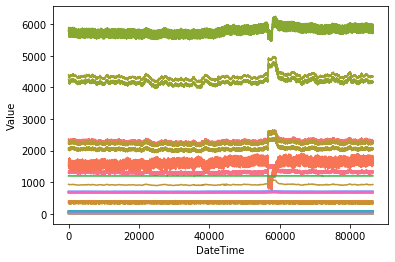

In [35]:
sns.lineplot(x='DateTime',y="Value",
             hue="Tagname",legend=False,
             data=df)

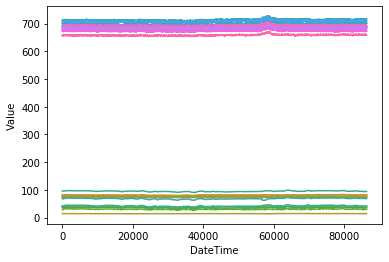

In [84]:
sns.lineplot(x='DateTime',y="Value",
             hue="Tagname",legend=False,
             data=df[df.Tag=='TI'])

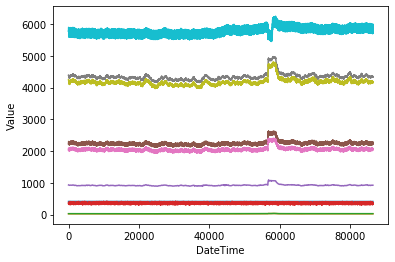

In [83]:
sns.lineplot(x='DateTime',y="Value",
             hue="Tagname",legend=False,
             data=df[df.Tag=='PI'])

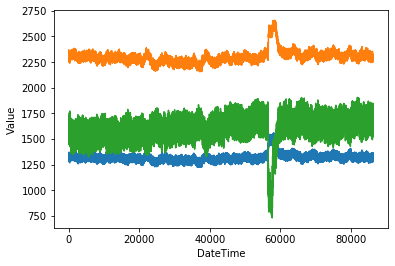

In [66]:
sns.lineplot(x='DateTime',y="Value",
             hue="Tagname",legend=False,
             data=df[df.Tag=='PDI'])

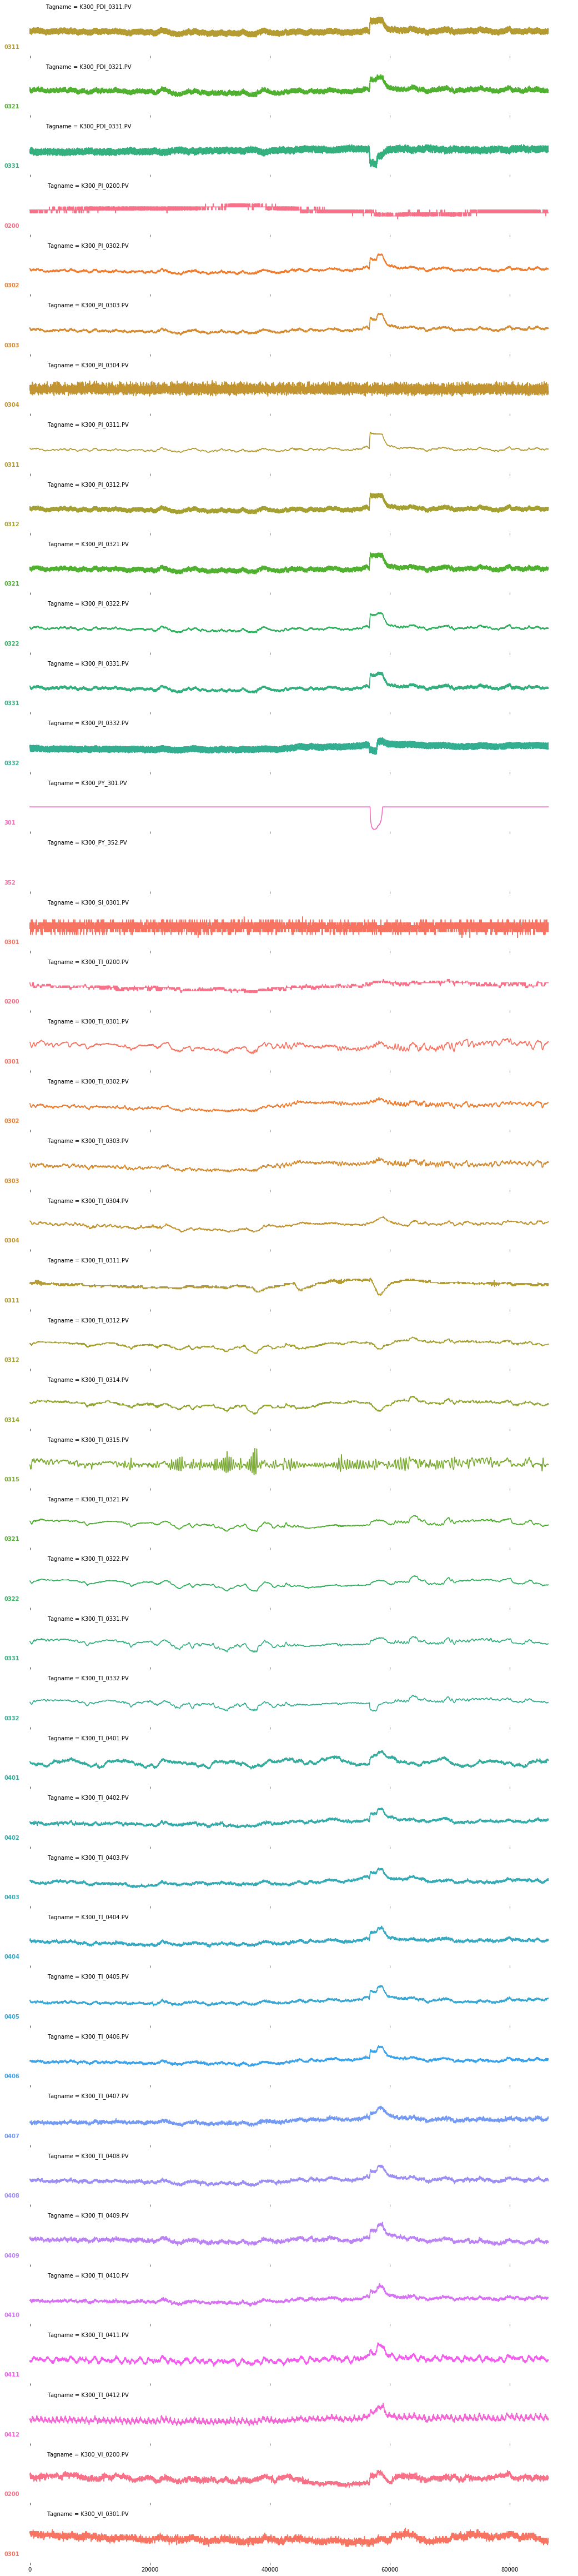

In [28]:
g = sns.FacetGrid(df, row="Tagname", hue="Number", aspect=10, height=1.5)
g.map(sns.lineplot, "DateTime",'NValue')
g.fig.subplots_adjust(hspace=-.25)
g.map(label, label="Tagname")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [24]:
def label(color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

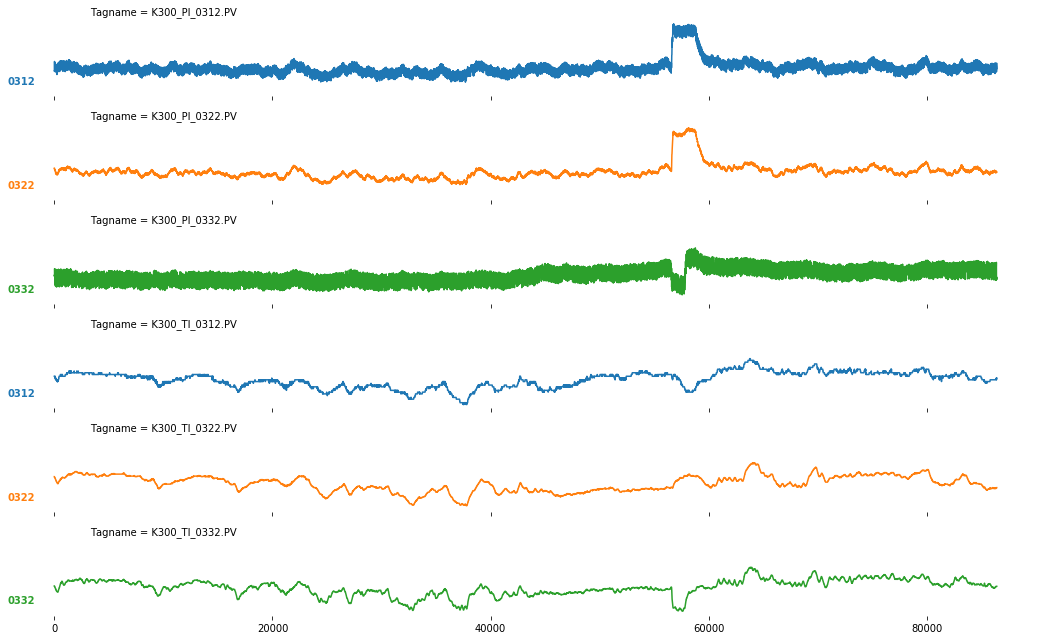

In [30]:
focus=['0312','0322','0332']
g = sns.FacetGrid(df[df.Number.isin(focus)], row="Tagname", hue="Number", aspect=10, height=1.5)
g.map(sns.lineplot, "DateTime",'NValue')
g.fig.subplots_adjust(hspace=-.25)
g.map(label, label="Tagname")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [39]:
data=np.zeros([len(np.unique(df.DateTime)),len(np.unique(df.Tagname))])
for i in range(len(np.unique(df.Tagname))):
    name=np.unique(df.Tagname)[i]
    data[:,i]=df[df.Tagname==name].Value 
pd_df=pd.DataFrame(data,columns=np.unique(df.Tagname))

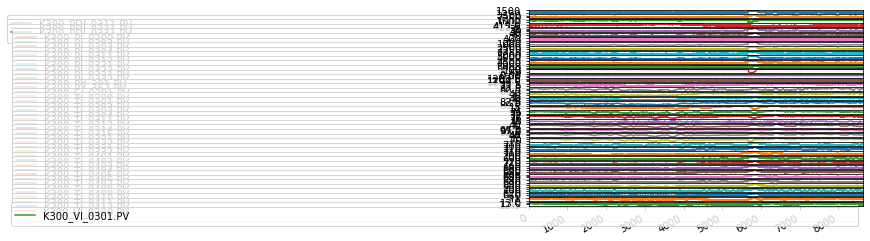

In [41]:
pd_df.plot(subplots=True)
plt.show()